**Import Dataset and Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Emotion AI/

/content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Emotion AI


In [ ]:
#Import necessary packages
import pandas as pd #Primarily used for data frame manipulation
import numpy as np #Used for numerical analysis
import os #Used for operating system
import PIL #Help us to deal with images
import seaborn as sns #Used for data visualization
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Activation, Add, ZeroPadding2D, Flatten, Dense, Dropout, AveragePooling2D, MaxPooling2D
from IPython.display import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
#Load facial key points data
keyfacial_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Modern AI Portfolio Builder/Emotion AI/data.csv')

In [ ]:
keyfacial_df #This must return x and y coordinates of every single key facial point that we have on our data. The last column of return table contain pixels of image.

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
#Obtain relavant information about the dataframe
keyfacial_df.info() #Return the data of table (Columns name, DataType)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
# Check if null values exist in the dataframe
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
keyfacial_df['Image'].shape #Image column is an 1D array contain all the values of image pixels

(2140,)

In [ ]:
#Since values for the image are given as space seperated string, seperate the values using '' as seperator.
#Then convert this into numpy array using np.formstring and convert the obtained 1D array into 2D array of shape (96, 96)
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x : np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [ ]:
# Obtain the shape of the image
keyfacial_df['Image'][0].shape # check row number 0 and we will see actual shape for it

(96, 96)

In [ ]:
#Challenge : Obtain the average, min and max values for 'right_eye_center_X'
keyfacial_df.describe()
# When we run this code it will be return a table has a row name so this is the explination of this rows : Count -> Her Kolondaki veri sayisi, Mean -> Ortalama deger, std -> Standart sapma....

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


**Perform Image Visualization**

'\nKod Açıklamsı :\ni = np.random.randint(1, len(keyfacial_df)): Bu satır, keyfacial_df adlı bir veri çerçevesinde rastgele bir satırın indeksini seçer ve bu indeksi i adlı bir değişkene atar. Seçilen satır, yüz ifadesi verilerini temsil eder.\nplt.imshow(keyfacial_df[\'Image\'][i], cmap=\'gray\'): Bu satır, keyfacial_df veri çerçevesindeki seçilen satırdaki \'Image\' sütunundaki bir görüntüyü görselleştirir. Görüntü siyah-beyaz olarak gösterilir (cmap=\'gray\').\nfor j in range(1, 31, 2): Bu döngü, 1\'den 31\'e kadar olan sayıları 2\'şer adımlarla gezerek bir altındaki işlemleri gerçekleştirir.\nplt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], \'rx\'): Bu satır, seçilen satırdaki yüz ifadesi verilerini belirler. keyfacial_df veri çerçevesindeki i numaralı satırdaki j-1 ve j sütunlarındaki koordinatları kullanarak kırmızı "x" işareti (\'rx\') çizer. Bu işaretle, yüz ifadesi verilerinin belirli noktalarını işaretler.\n----------------------------------------------------\n\'rx\

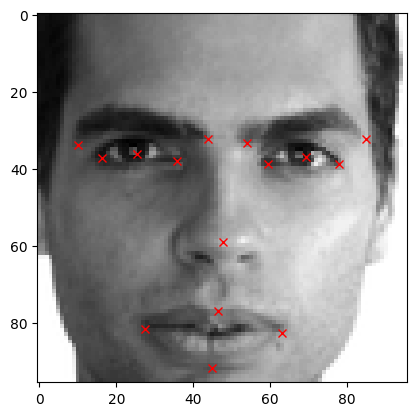

In [ ]:
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

'\nfig = plt.figure(figsize=(20, 20)): Bu satır, 20x20 inçlik bir figür oluşturur. Bu figür, alt grafiklerin bulunacağı bir çerçeve olarak kullanılır.\n\nfor i in range(16): Bu döngü, 16 farklı yüz ifadesi verisini işlemek için kullanılır. Her bir yüz ifadesi verisi için bir alt grafik oluşturulacak ve veri bu alt grafikte görselleştirilecektir.\n\nax = fig.add_subplot(4, 4, i+1): Bu satır, 4x4 bir alt grafik düzeni içinde i+1 numaralı bir alt grafik oluşturur. i değişkeni, yüz ifadesi verilerini döngü ile sırayla işlerken kullanılır.\n\nimage = plt.imshow(keyfacial_df[\'Image\'][i], cmap="gray"): Bu satır, keyfacial_df veri çerçevesinin \'Image\' sütunundan seçilen görüntüyü siyah-beyaz olarak görselleştirir ve bu görüntüyü image adlı değişkene atar.\n\nfor j in range(1, 31, 2): Bu iç içe döngü, her bir yüz ifadesi verisi için 15 farklı yüz ifadesi noktasını işlemek için kullanılır. Bu noktaları belirli bir alt grafik üzerine yerleştirecektir.\n\nplt.plot(keyfacial_df.loc[i][j-1], key

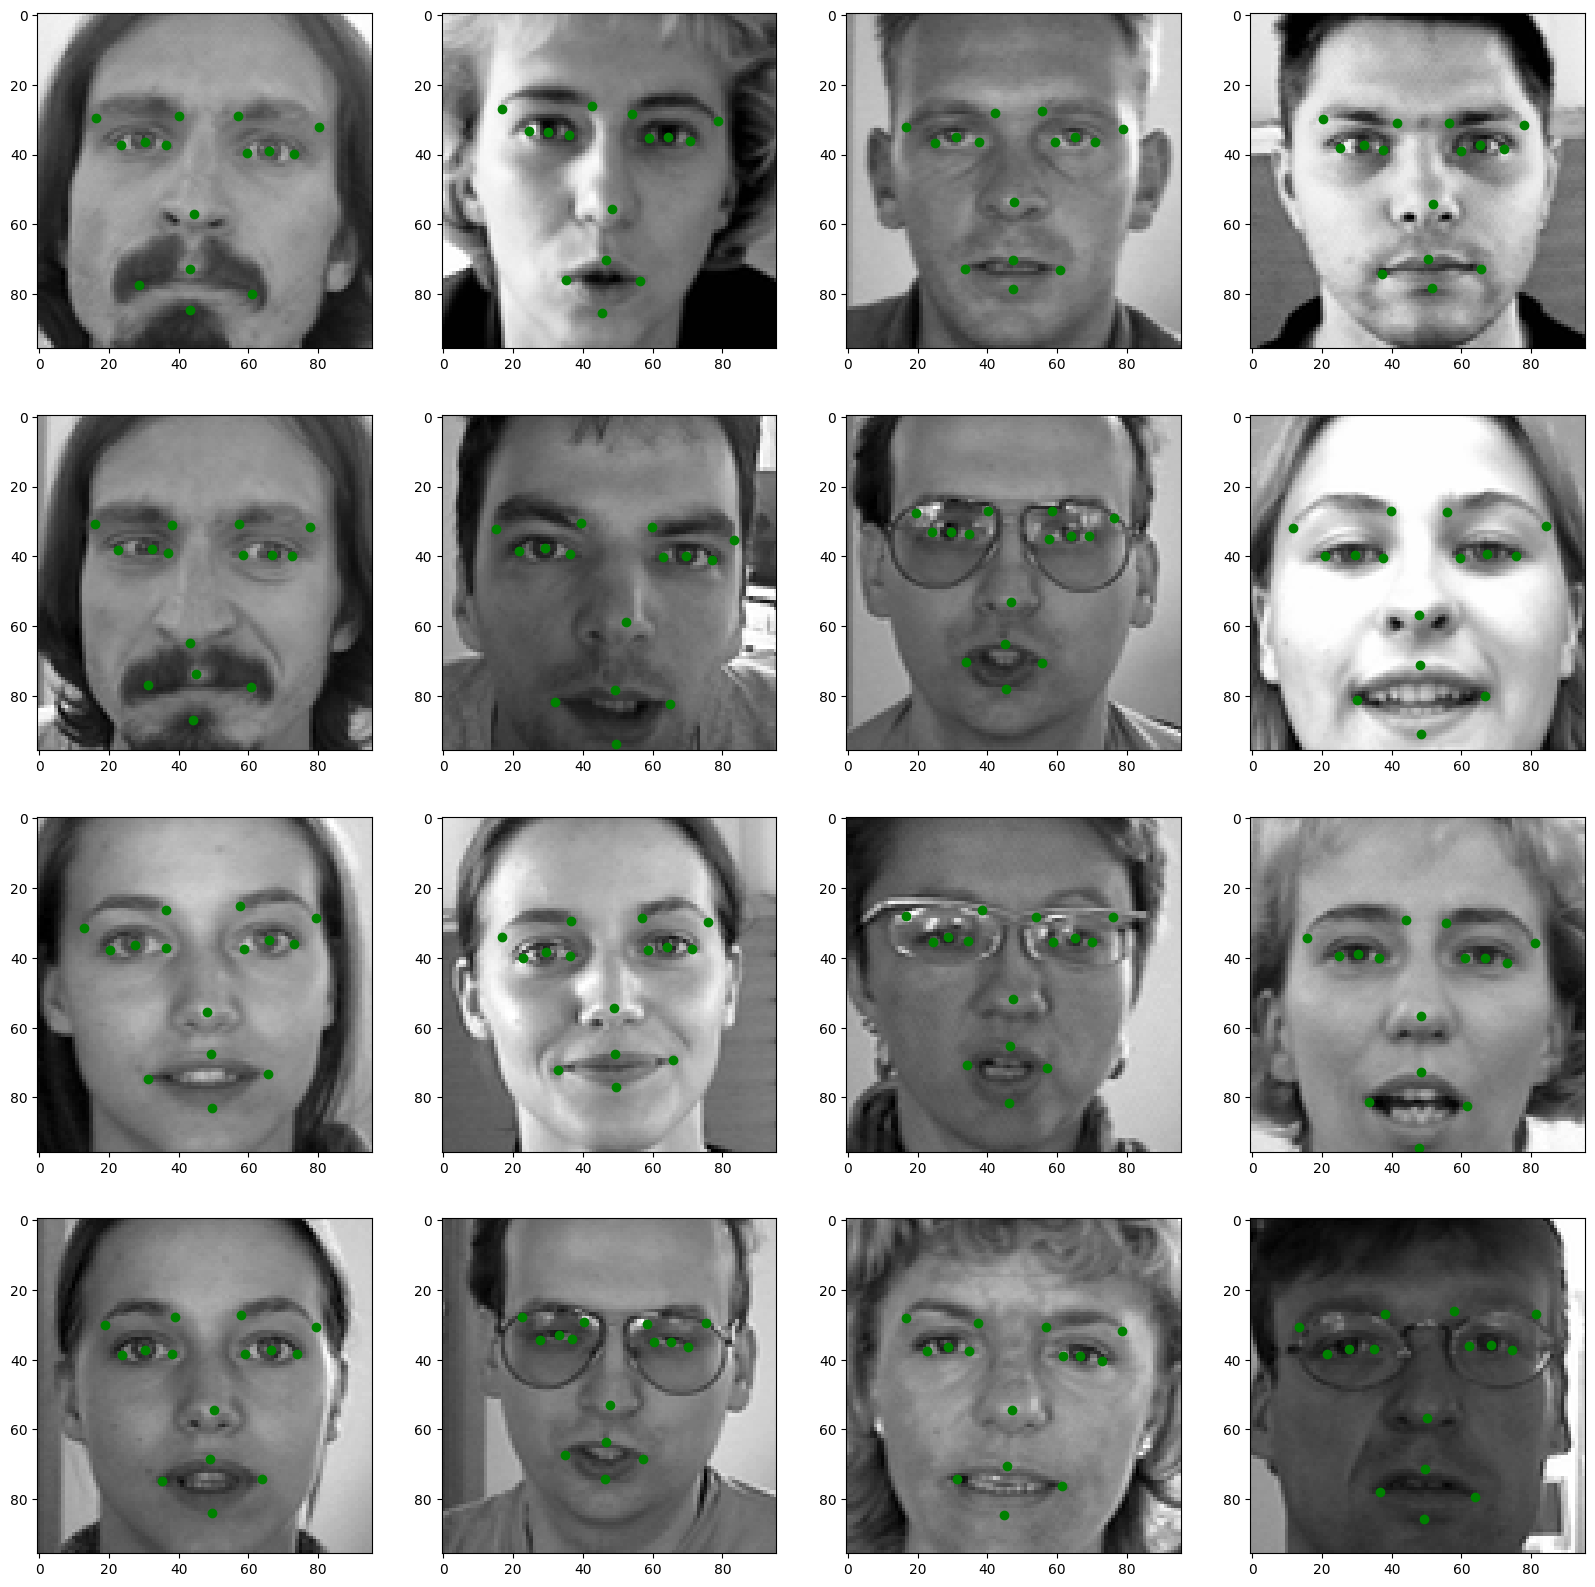

In [ ]:
#Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))
for i in range(16):
  ax = fig.add_subplot(4, 4, i+1)
  image = plt.imshow(keyfacial_df['Image'][i],cmap = "gray")
  for j in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'go')

In [ ]:
# Create a new copy of the dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [ ]:
# Obtain the columns in the dataframe
columns = keyfacial_df_copy.columns[:-1]
columns

In [ ]:
# Horizontal Flip - flip the images along y axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x : np.flip(x, axis = 1))

# Since we are flipping horizontally, y coordinate values would be the same
# Only x coordinate values whould change, all we have to do is to subtract out initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0: #only picking up the x columns
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x : 96. - float(x))

In [ ]:
# Show the original Image
plt.imshow(keyfacial_df['Image'][2], cmap = 'gray')
for j in range(1, 31, 2):
  plt.plot(keyfacial_df.loc[2][j-1], keyfacial_df.loc[2][j], 'rx')

In [ ]:
# Show the horizontally flipped image
plt.imshow(keyfacial_df_copy['Image'][1], cmap = 'gray')
for j in range(1, 31, 2):
  plt.plot(keyfacial_df_copy.loc[1][j-1], keyfacial_df_copy.loc[0][j], 'rx')

**Another type of Augmentaion : Increase Brightness of the images**

In [ ]:
# Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [ ]:
augmented_df.shape #augmented_df dizisinin boyutlarını döndürür. Dizi boyutları, dizinin kaç satır ve sütundan oluştuğunu belirtir.

In [ ]:
# Randomingly increasing the brightness of the images
# We multiply pixel values by random values between 1.5 and 2 to increse the brightness of the images
# We clip the value between 0 and 255

import random
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x : np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

In [ ]:
# Show Image with increased brightness
plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

NameError: name 'keyfacial_df_copy' is not defined

In [ ]:
# Challenge : Augment images by flipping them vertically (Hint : Flip along x-axis and note that if we are flipping along x-axis, x-coordinate wont't change)
keyfacial_df_copy = copy.copy(keyfacial_df)

NameError: name 'copy' is not defined

In [ ]:
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x : np.flip(x, axis = 0))
for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x : 96. - float(x))

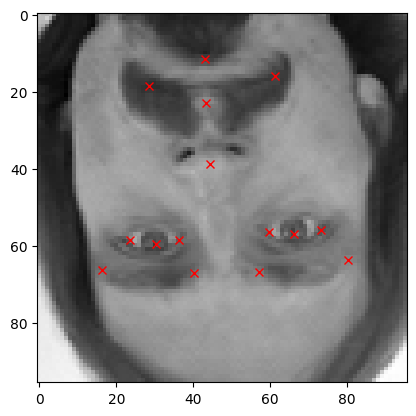

In [ ]:
# Challenge : Perform a sanity check and visualize sample images (Show the flipped images)
plt.imshow(keyfacial_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

**Perform Data Normalization and Training Data Preparation**

In [ ]:
# Obtain the value of images which is present in the 31st column (since index start from 0, we refer to 31st column by 30)
img = augmented_df[:,30]

# Normalize the images
img = img/255

# Create an empty array of imh list and add image values to the empty array after expending it's dimension from (96, 96) to (96, 96, 1)
X = np.empty((len(img),96,96,1))

# Iterate an empty array of shape (x, 96, 96, 1) to feed the model
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

"\naugmented_df adlı bir diziden 31. sütunun değerlerini (img) alır. Bu sütunun indeksi 30'dur, çünkü Python'da indeksler 0'dan başlar.\nimg dizisindeki görüntüleri 0 ile 255 arasında normalize eder. Bu, görüntü piksel değerlerini 0 ile 1 arasında bir aralığa dönüştürür.\nGörüntüleri (96, 96, 1) boyutunda bir diziye yerleştirmek için boş bir X dizisi oluşturur. X dizisi, img dizisindeki her görüntüyü tek kanallı (grayscale) hale getirir ve boyutlarını (96, 96, 1) yapar.\nfor döngüsü kullanarak boş X dizisini doldurur. Her bir görüntüyü np.expand_dims kullanarak boyutunu (96, 96, 1) yapar ve X dizisine ekler.\nSon olarak, X dizisinin veri tipini float32'ye dönüştürür ve X.shape ifadesi ile X dizisinin boyutlarını döndürür. Bu, veriyi modelin beslemeye uygun bir formata getirir ve modelin girdi olarak kullanılabilir hale getirir.\n\nNeden float32'ye dönüştürüldü :\nX veri tipini float32'ye dönüştürme, verilerin model tarafından daha etkili bir şekilde işlenmesine ve hesaplamaların daha h

In [ ]:
# Obtain the value of x and y coordinates which are to used as target
y = augmented_df[:,:30] # Select all columns except Image column
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
# Split the data into train and test data
# Split data into 80% to perform the training and 20% to perform the testing
# So what we do is that we take our all the data and then we divide them into training and testing
# The idea here is that we use the training data to train our model, and once the model is trained, then we test it on data that the model has never seen before during training and this is very important concept
# The idea again, we want our model to be able to generalize and not memorize
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

"\nX veri dizisi, modelin girdi verisi olarak kullanılacak özellikleri içerir.\ny veri dizisi, bu özelliklere karşılık gelen hedef etiketleri içerir.\ntrain_test_split işlevi, verilerinizi rastgele iki alt küme halinde böler: biri eğitim verisi, diğeri test verisi.\n\ntest_size parametresi, verilerin yüzde kaçının test verisi olarak ayrılacağını belirler.\nBurada test_size = 0.1, verilerin yüzde 10'unun test verisi olarak ayrılacağı anlamına gelir.\n\nSonuç olarak, bu kod X ve y verilerini rastgele iki alt kümeye böler. X_train ve y_train, eğitim verilerini içerir, X_test ve y_test ise test verilerini içerir. Bu, bir makine öğrenme modelini eğitirken eğitim verilerini kullanmanızı ve ardından modelin performansını değerlendirmek için test verilerini kullanmanızı sağlar. Bu bölmeyi kullanmak, modelin aşırı uydurmayı (overfitting)\nönlemek ve gerçek dünya verilerine daha iyi genelleme yapmasına yardımcı olur.\n"

In [ ]:
# Check out X_train and we can try for y
X_train.shape

(5136, 96, 96, 1)

In [ ]:
# Check out X_test and we can try for y
X_test.shape

(1284, 96, 96, 1)

In [ ]:
#Res Block (Details in image up this code)
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
# Final Model (Details in image up this code)
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, 102, 102, 1)          0         ['input_5[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_4[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']         

**Compile And Train Facial Key Points Detector Model**

In [ ]:
# Compling the model and actually taining it is really easy so here we gonna specify and we are going to use Adam Optimizer
# Check this out for more information on Adam optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose=1, save_best_only = True)

In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs =2, validation_split = 0.09, callbacks=[checkpointer])

Epoch 1/2
146/147 [============================>.] - ETA: 0s - loss: 8.7356 - accuracy: 0.8140
Epoch 1: val_loss did not improve from 2.83803
147/147 [==============================] - 14s 22ms/step - loss: 8.7343 - accuracy: 0.8138 - val_loss: 6.4753 - val_accuracy: 0.8315
Epoch 2/2
145/147 [============================>.] - ETA: 0s - loss: 5.8160 - accuracy: 0.8172
Epoch 2: val_loss did not improve from 2.83803
147/147 [==============================] - 3s 21ms/step - loss: 5.7966 - accuracy: 0.8175 - val_loss: 5.6308 - val_accuracy: 0.8380


In [ ]:
# Save the model architecture to json file for future use
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json", "w") as json_file :
  json_file.write(model_json)

**Assess Trained Key Facial PointsDetection Model Performance**

In [ ]:
with open('detection.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [ ]:
# Evaluate the model
result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print('Accuracy : {}'.format(result[1]))

41/41 [==============================] - 1s 6ms/step - loss: 11.2820 - accuracy: 0.8310
Accuracy : 0.8309968709945679


In [ ]:
# Get the model keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

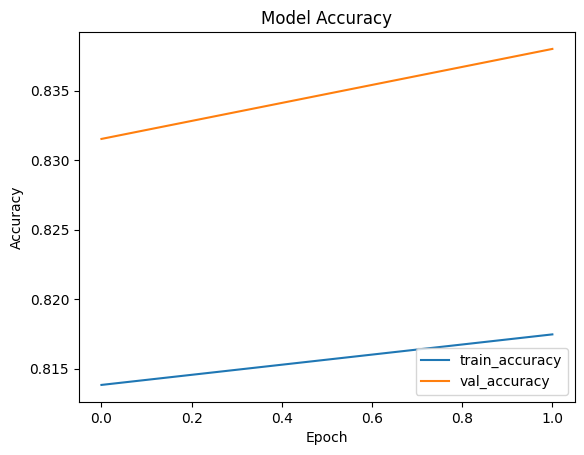

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='lower right')
plt.show()

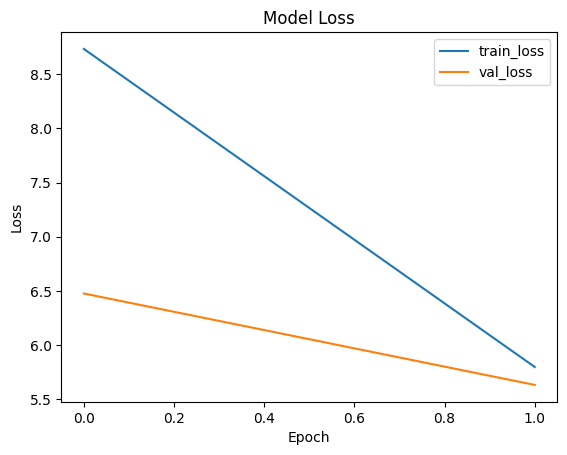

In [ ]:
# Plto the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

In [ ]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv('icml_face_data.csv')

In [ ]:
facialexpression_df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [ ]:
facialexpression_df[' pixels'][0] # String format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# function to convert pixel values in string format to array format

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Resize images from (48, 48) to (96, 96)

def resize(x):

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

,emotion,pixels
0,0,"[[69.316925, 73.03865, 79.13719, 84.17186, 85...."
1,0,"[[151.09435, 150.91393, 150.65791, 148.96367, ..."
2,2,"[[23.061905, 25.50914, 29.47847, 33.99843, 36...."
3,2,"[[20.083221, 19.079437, 17.398712, 17.158691, ..."
4,3,"[[76.26172, 76.54747, 77.001785, 77.7672, 78.4..."


In [ ]:
# check the shape of data_frame
facialexpression_df.shape

(24568, 2)

In [ ]:
# check for the presence of null values in the data frame
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

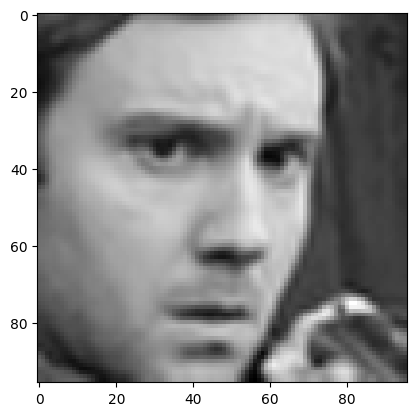

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

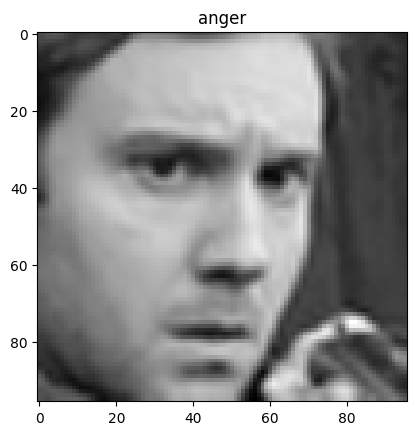

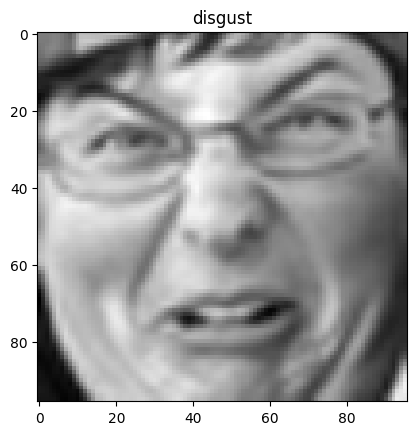

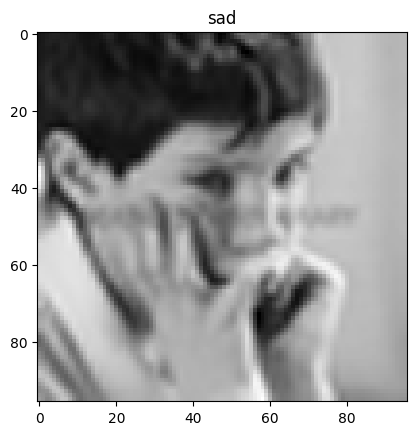

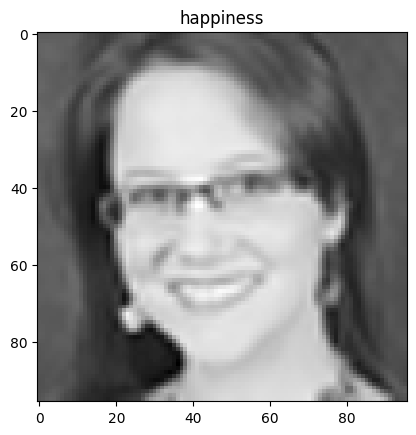

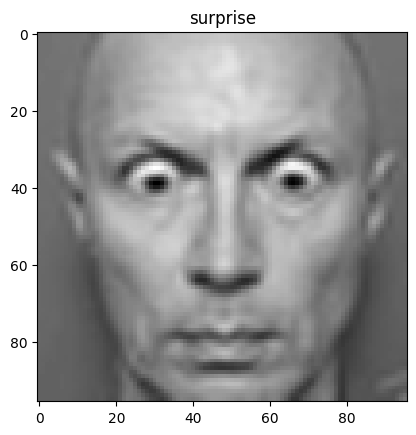

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

In [ ]:
facialexpression_df.emotion.value_counts().index

Index([3, 2, 0, 4, 1], dtype='int64', name='emotion')

In [ ]:
facialexpression_df.emotion.value_counts()

emotion
3    8989
2    6077
0    4953
4    4002
1     547
Name: count, dtype: int64

<Axes: xlabel='emotion', ylabel='count'>

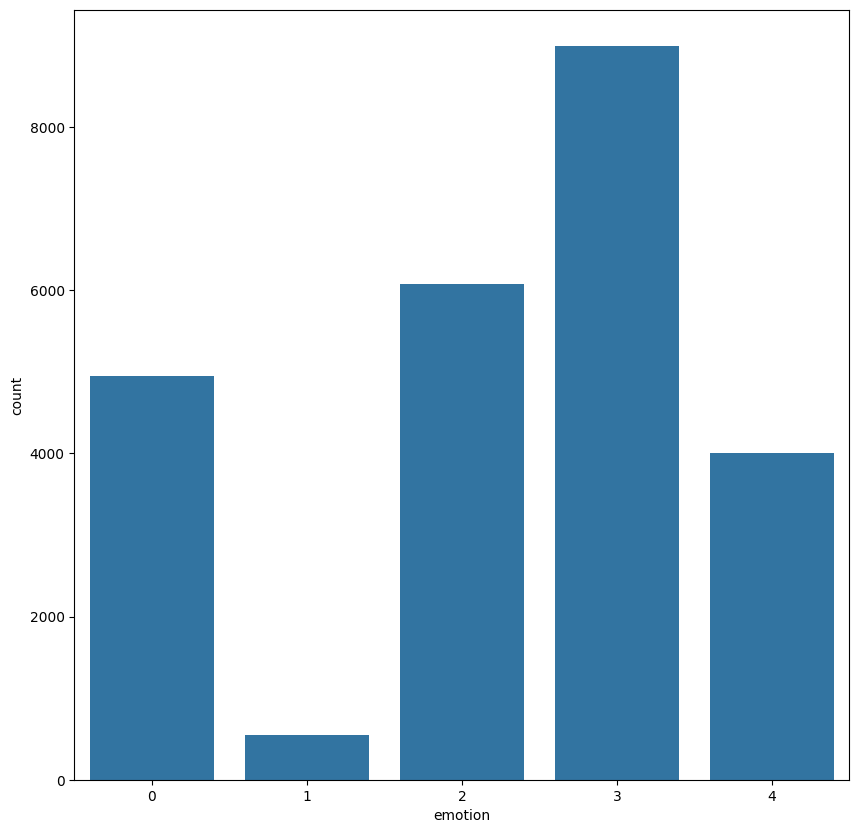

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

In [ ]:
# split the dataframe in to features and labels
from keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])


In [ ]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [ ]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:

X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [ ]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [ ]:
print(X_train.shape, y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
X_train

array([[[[ 0.37489408],
         [ 0.36425555],
         [ 0.34694573],
         ...,
         [ 0.6656941 ],
         [ 0.6270216 ],
         [ 0.6031033 ]],

        [[ 0.3485272 ],
         [ 0.34128994],
         [ 0.3296894 ],
         ...,
         [ 0.7004496 ],
         [ 0.6357414 ],
         [ 0.5962857 ]],

        [[ 0.30343717],
         [ 0.30198997],
         [ 0.3001063 ],
         ...,
         [ 0.7578845 ],
         [ 0.6492657 ],
         [ 0.58359665]],

        ...,

        [[ 0.051394  ],
         [ 0.05122489],
         [ 0.05088669],
         ...,
         [ 0.06666667],
         [ 0.06666667],
         [ 0.06666667]],

        [[ 0.05111826],
         [ 0.05087376],
         [ 0.05038476],
         ...,
         [ 0.06666667],
         [ 0.06666667],
         [ 0.06666667]],

        [[ 0.05098039],
         [ 0.05069011],
         [ 0.05010957],
         ...,
         [ 0.06666667],
         [ 0.06666667],
         [ 0.06666667]]],


       [[[ 0.35625964],


In [ ]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")


In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
#Glorot_uniform başlatma yöntemi, ağırlıkları belirli bir dağılım içinde rastgele başlatır.
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_5 (ZeroPadd  (None, 102, 102, 1)          0         ['input_6[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_5[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']        

**Train The Model and Assess Model Performance**

In [ ]:
# train the network
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Recall that the first facial key points model was saved as follows: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [ ]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 9, callbacks=[checkpointer, earlystopping])

Epoch 1/9
344/345 [============================>.] - ETA: 0s - loss: 1.2390 - accuracy: 0.4959
Epoch 1: val_loss improved from inf to 1.46064, saving model to FacialExpression_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


345/345 [==============================] - 30s 56ms/step - loss: 1.2381 - accuracy: 0.4962 - val_loss: 1.4606 - val_accuracy: 0.4210
Epoch 2/9
345/345 [==============================] - ETA: 0s - loss: 0.9185 - accuracy: 0.6394
Epoch 2: val_loss improved from 1.46064 to 1.07109, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 19s 54ms/step - loss: 0.9185 - accuracy: 0.6394 - val_loss: 1.0711 - val_accuracy: 0.5822
Epoch 3/9
345/345 [==============================] - ETA: 0s - loss: 0.8175 - accuracy: 0.6800
Epoch 3: val_loss did not improve from 1.07109
345/345 [==============================] - 18s 52ms/step - loss: 0.8175 - accuracy: 0.6800 - val_loss: 1.1607 - val_accuracy: 0.5212
Epoch 4/9
345/345 [==============================] - ETA: 0s - loss: 0.7539 - accuracy: 0.7064
Epoch 4: val_loss improved from 1.07109 to 0.86897, saving model to FacialExpression_weights.hdf5
345/345 [==============================] - 19s 55ms/step - loss: 0.7539 -

In [ ]:
# saving the model architecture to json file for future use

model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

**Assess The Performance Of Trained Facial Expression Classifier Model**

What we are going to do here is instead of simply just waiting until the model is being trained

In [ ]:
with open('FacialExpression-model.json', 'r') as json_file:
  json_savedModel = json_file.read()

# Load the model architecture
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('FacialExpression_weights.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Test Accuracy : {}'.format(score[1]))

39/39 [==============================] - 1s 8ms/step - loss: 0.6421 - accuracy: 0.7640
Test Accuracy : 0.7640358209609985


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


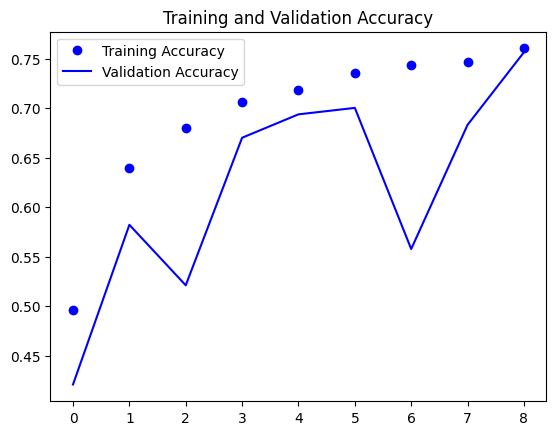

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

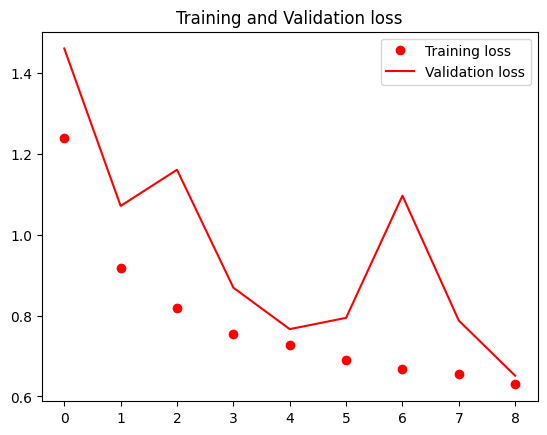

In [ ]:
plt.plot(epochs, loss, 'ro', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
# Predicted_classes = model.predict_classes(X_test)
# obtain the actual predictions coming from the model
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis = -1)
y_true = np.argmax(y_Test, axis = -1)

39/39 [==============================] - 1s 5ms/step


In [ ]:
y_true.shape

(1229,)

<Axes: >

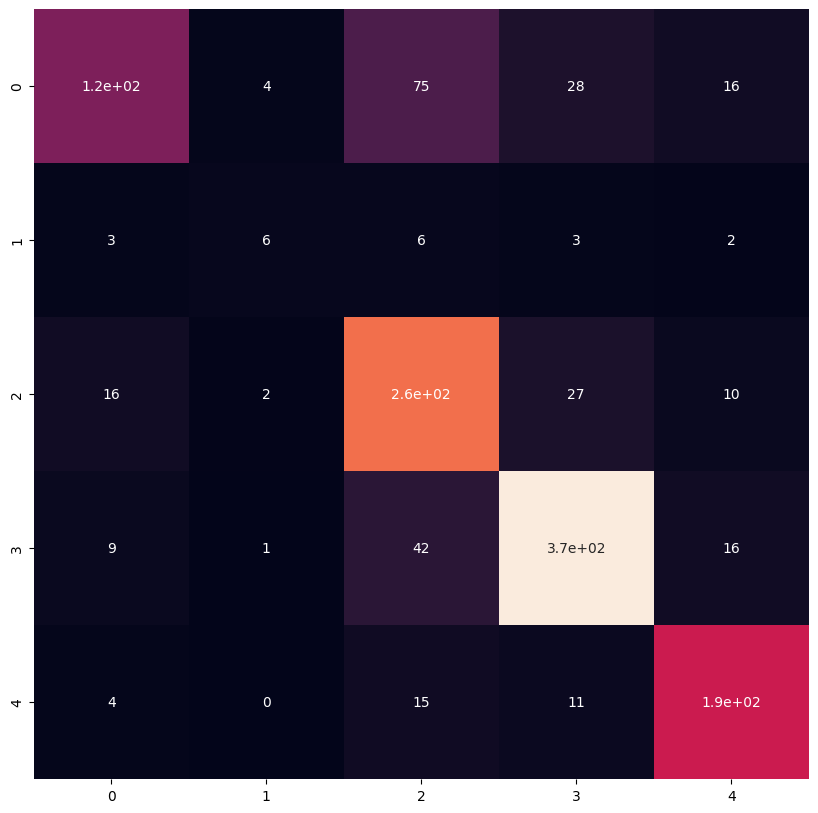

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

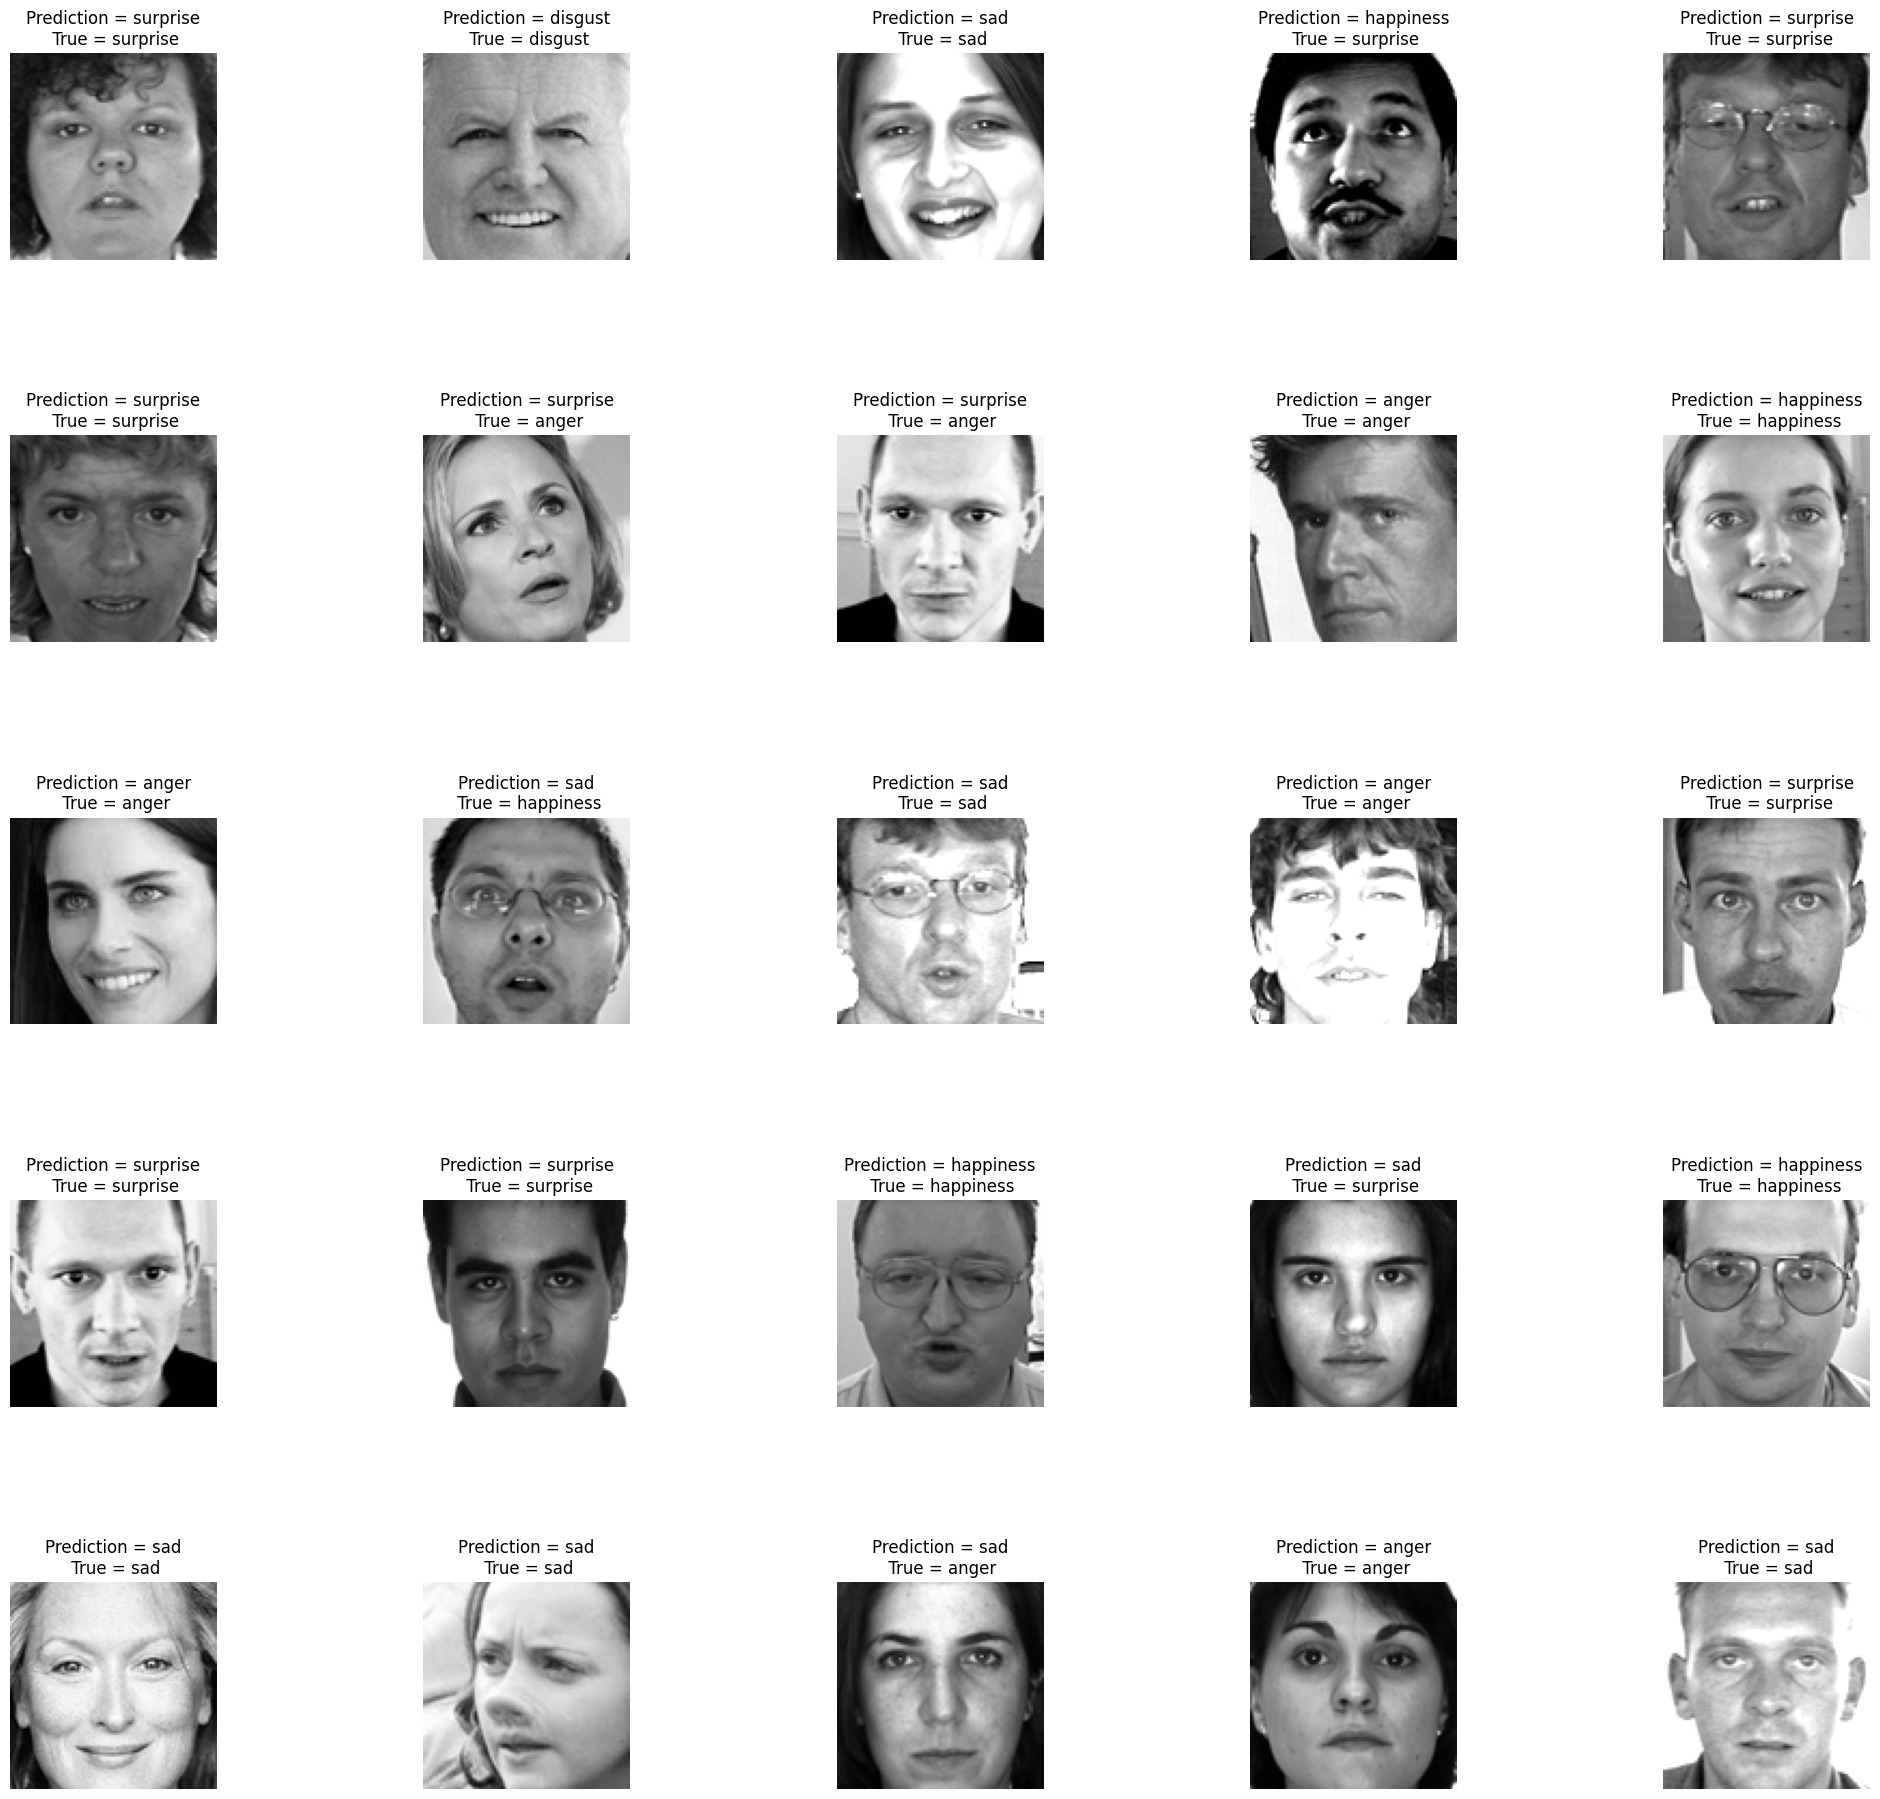

In [ ]:
# Print out a grid of 25 images along with their predicted/true label
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i].reshape(96, 96), cmap ='gray')
  axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [ ]:
# Print out the calssification report and analyze precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.79      0.49      0.60       241
           1       0.46      0.30      0.36        20
           2       0.65      0.82      0.73       313
           3       0.84      0.85      0.84       439
           4       0.81      0.86      0.83       216

    accuracy                           0.76      1229
   macro avg       0.71      0.66      0.67      1229
weighted avg       0.77      0.76      0.76      1229



**Make Predictions from Both Models**

In [ ]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
df_predict = predict(X_test)

41/41 [==============================] - 0s 5ms/step


In [ ]:
df_predict.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,66.908264,35.379131,29.373533,36.000671,60.388481,35.835831,72.970131,36.406631,35.678764,35.871559,...,45.338165,63.874401,72.039810,33.396622,72.655693,47.710835,63.683559,48.282536,78.124588,2
1,25.553677,38.530468,64.169518,37.860470,33.497387,39.362114,17.599941,39.172119,56.791721,38.936680,...,61.887321,24.428610,73.753998,64.975632,73.477699,45.657803,75.738701,45.970390,84.470314,3
2,68.366318,34.632317,29.316483,37.501987,60.391949,35.985001,76.762779,34.705700,36.881832,37.476238,...,58.291924,70.058723,73.950699,33.034626,76.555695,50.431000,71.183144,51.188061,86.590195,3
3,68.372536,36.509304,30.713469,37.868195,62.136311,37.218491,74.731277,37.363056,36.528122,37.964989,...,55.200550,64.012070,75.629044,34.207390,76.163826,48.026951,69.408104,48.418228,84.850708,3
4,25.756878,32.409088,65.737839,34.382614,31.922739,33.192173,19.215754,33.102249,58.945915,34.319481,...,50.215305,28.262896,74.165680,57.741440,74.674446,43.950348,66.835922,43.282394,83.630760,3


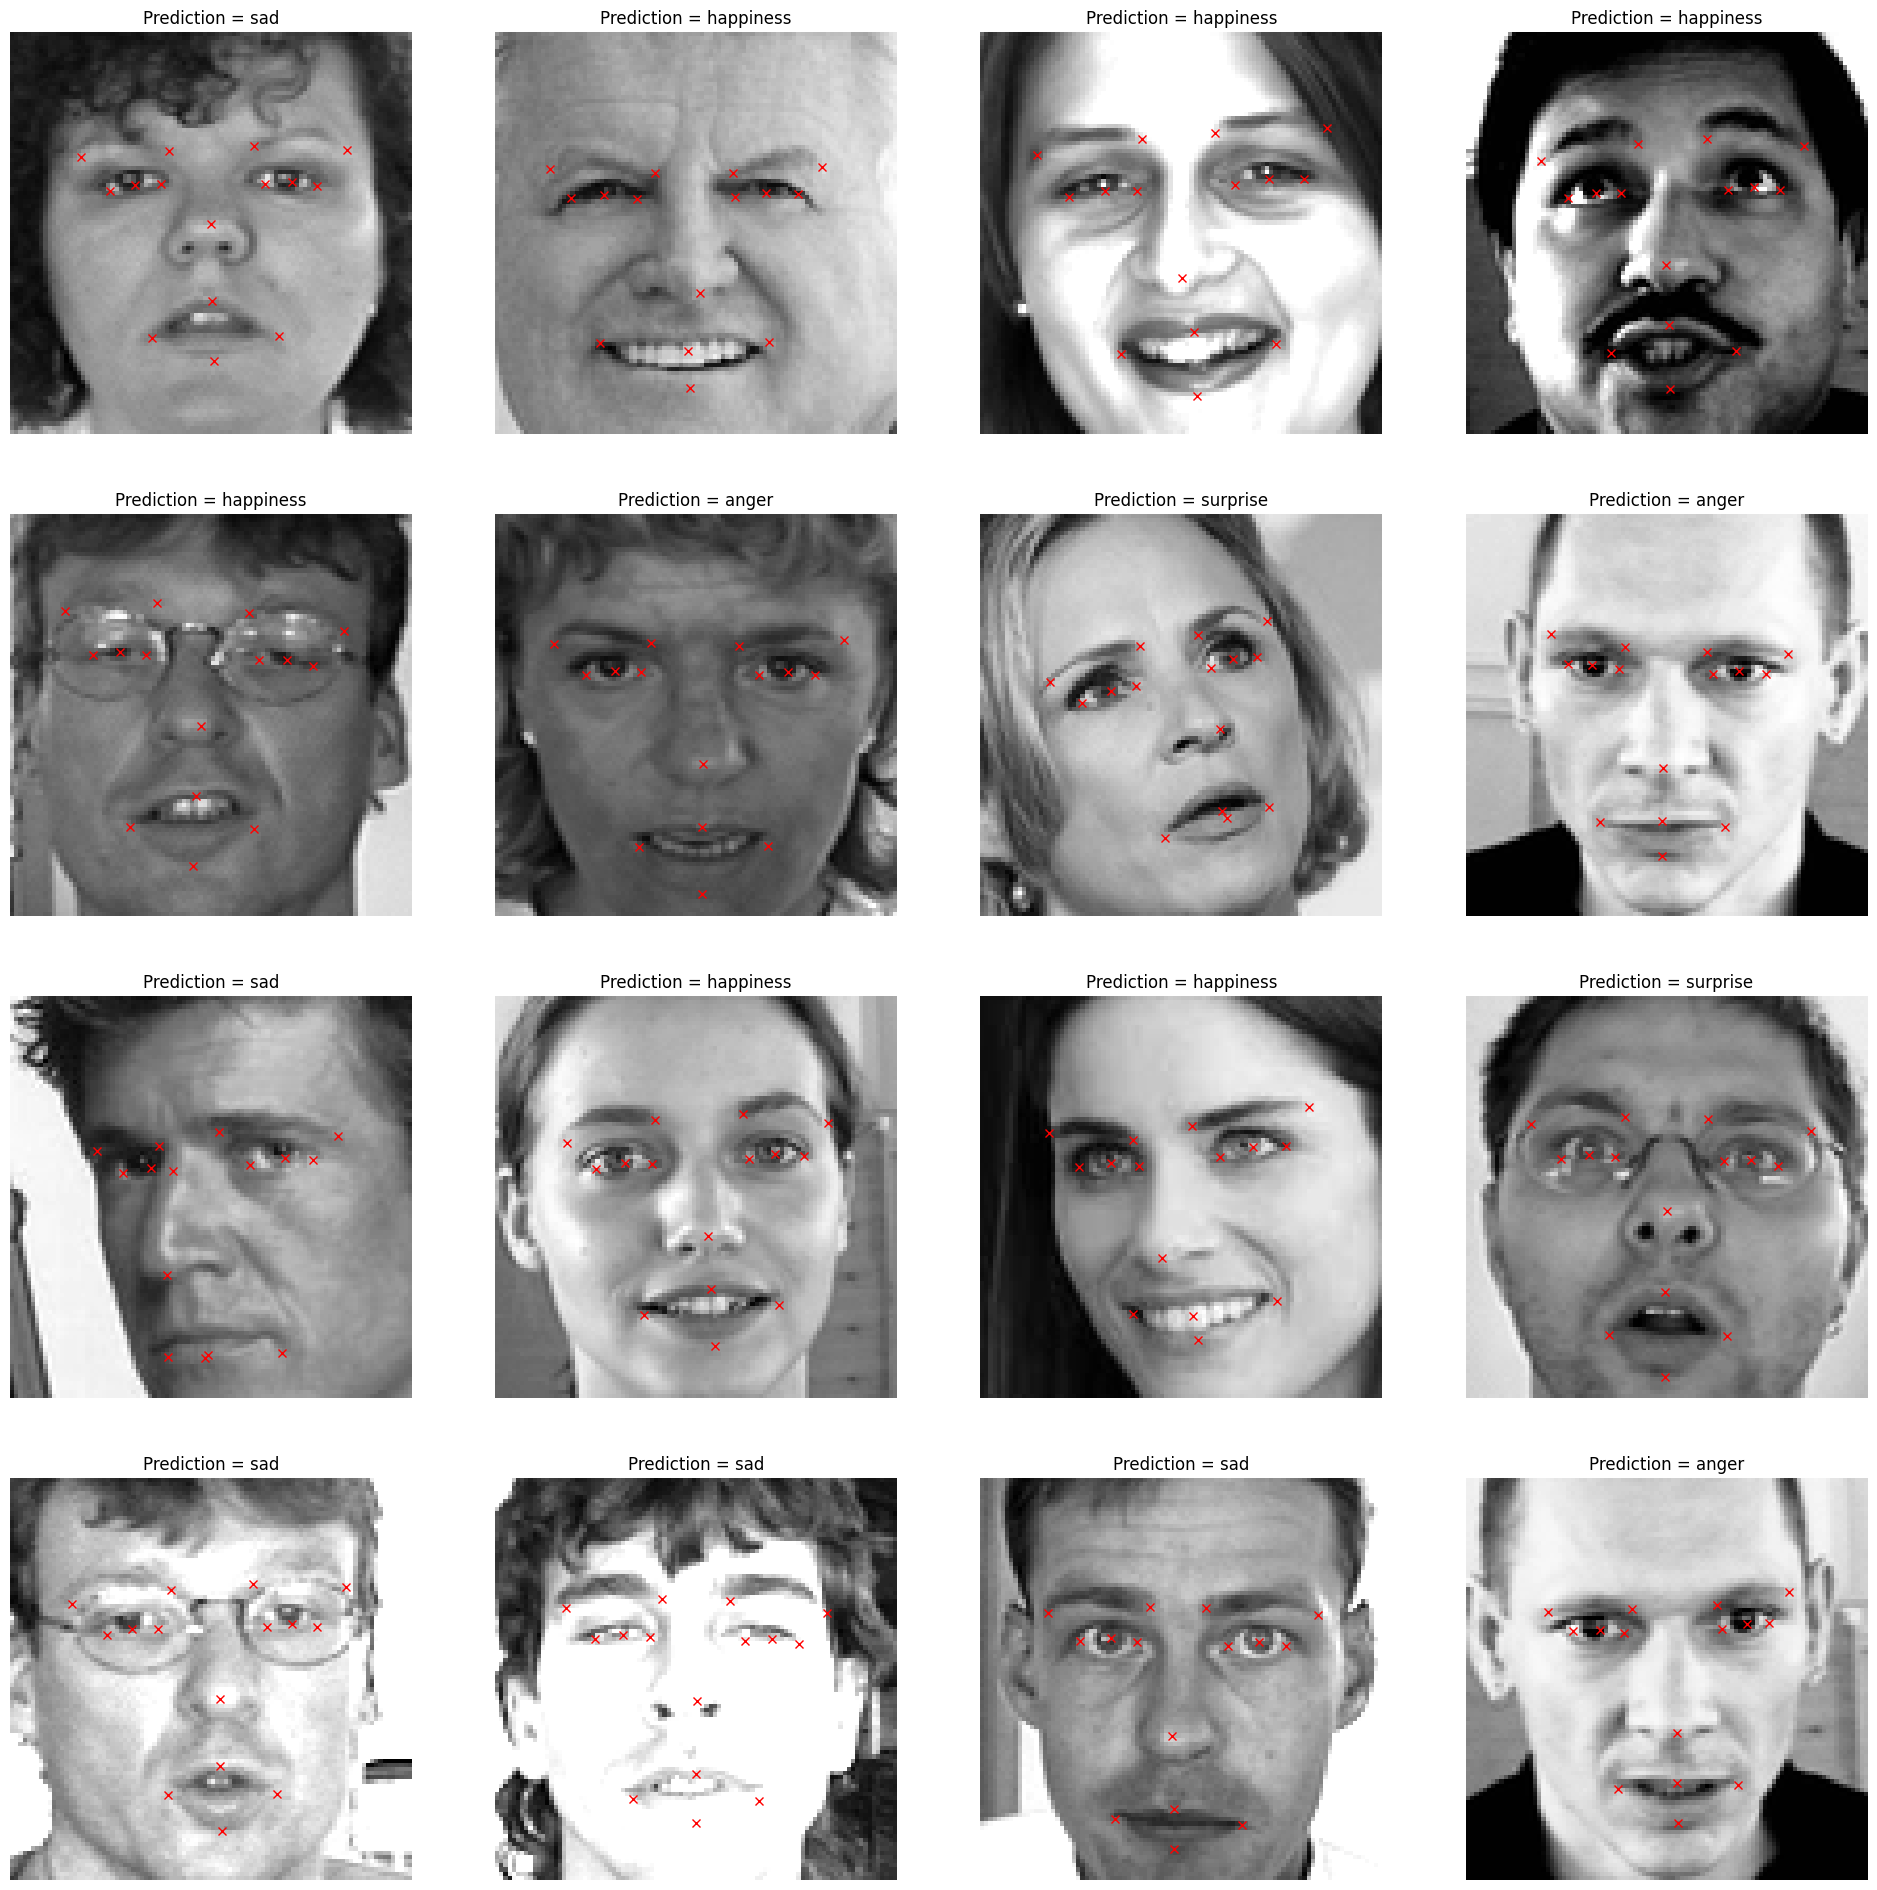

In [ ]:
# Plot a grid of 16 images along with their predicted emotion and facial key points
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
axes = axes.ravel()

for i in range(16):
  axes[i].imshow(X_test[i].squeeze(), cmap = 'gray')
  axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
  axes[i].axis('off')
  for j in range(1, 31, 2):
    axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

**Deploy Both Trained Models**

Save The Trained Model For Deployment

We need to save out trained model and it has to be saved in a saveModel format

The model will have a version number and will be saved in a structured directory

tf.saved_model.save is a function used to build a saved model that is suitable for serving unsing tensorflow Serving

after the model is saved we can now use tensorflow serving to start making inference requests using a specific version of our tained model "servable"

Use saveModel to save and load out model=variables, the graph and the graph's metadata

In [ ]:
import json
import tensorflow.keras.backend as K

def deploy(directory, model):
  MODEL_DIR = directory
  version = 1

  #lets join the temp model directory with our chosen version number
  # the expected result will be = "\tmp\version number"
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  #lets save the model using save_model.save
  #if the directory already exists, we will remove it using '!rm'
  # rm removes each file specified on the comman line

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)
  os.environ["MODEL_DIR"] = MODEL_DIR

**SERVE THE MODEL USING TENSORFLOW**

In [ ]:
# Let's add tensorflow-model-server package to our list of packages
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0   2376      0  0:00:01  0:00:01 --:--:--  2375
OK
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:7 https://ppa.la

In [ ]:
# Let's install tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tensorflow-model-server is already the newest version (2.16.1).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [ ]:
deploy('/model', model_1_facialKeyPoints)

export_path = /model/1


Already saved a model, cleaning up



In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

In [ ]:
deploy('/model1', model_2_emotion)

export_path = /model1/1


Already saved a model, cleaning up



In [ ]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [ ]:
!tail server.log

**MAKE REQUESTS TO MODEL IN TENSORFLOW SERVING**

---



In [ ]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:6].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 127], [0.6666666865348816], [0.9137254953384399]]]]}


In [ ]:
!pip install -q requests

In [ ]:
import requests

# Function to make predictions from deployed models
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [ ]:
# making prediction
df_predict = response(data)

In [ ]:
df_predict

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,emotion
0,66.908264,35.379131,29.373533,36.000679,60.388489,35.835834,72.970123,36.406632,35.678764,35.871559,...,45.338165,63.874397,72.039810,33.396622,72.655700,47.710831,63.683563,48.282536,78.124580,2
1,25.553679,38.530464,64.169517,37.860466,33.497387,39.362118,17.599939,39.172115,56.791721,38.936684,...,61.887325,24.428604,73.754005,64.975632,73.477707,45.657803,75.738716,45.970398,84.470337,3
2,68.366300,34.632320,29.316485,37.502000,60.391945,35.985004,76.762787,34.705704,36.881840,37.476238,...,58.291931,70.058723,73.950691,33.034638,76.555700,50.431000,71.183159,51.188057,86.590187,3
3,68.372551,36.509300,30.713465,37.868200,62.136322,37.218494,74.731270,37.363056,36.528118,37.964993,...,55.200546,64.012077,75.629051,34.207390,76.163834,48.026947,69.408119,48.418228,84.850716,3
4,25.756872,32.409088,65.737839,34.382610,31.922739,33.192173,19.215748,33.102249,58.945915,34.319473,...,50.215300,28.262896,74.165695,57.741444,74.674431,43.950348,66.835915,43.282400,83.630768,3
5,69.525612,37.235310,28.009439,37.041042,62.605228,37.837173,75.944382,37.849869,34.290939,37.321312,...,59.297230,64.635651,78.868324,33.801487,79.062408,48.802372,74.386261,48.851555,90.313026,0


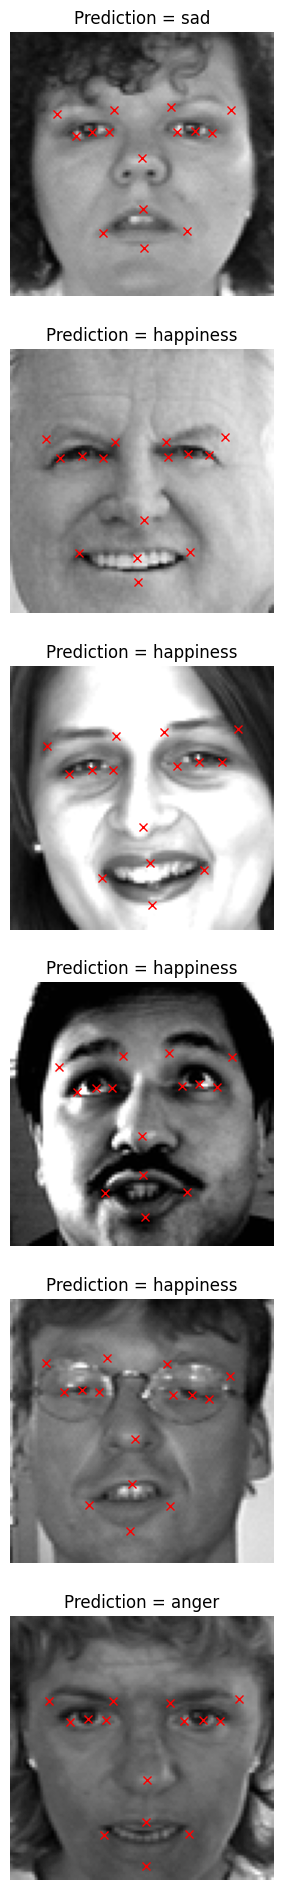

In [ ]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(6, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(6):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
